In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
# Load the Iris dataset
iris = load_iris()

In [6]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
inertia = []
k_values = range(1, 11)  # Test cluster numbers from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster'], errors='ignore'))
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.vlines(x=2,ymin=0,ymax=600,linestyles='--')
plt.text(x=3.5,y=400,s='2 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
plt.grid()
plt.show()

In [12]:
max_clusters=10
silhouette_scores = []

In [13]:
#Elbow method
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [14]:
# Find optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

In [15]:
# Final K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
df['KMeans_Cluster'].unique()

array([1, 0])

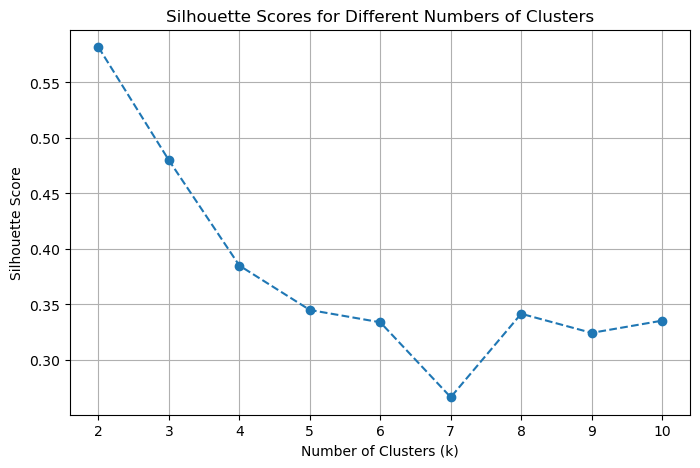

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

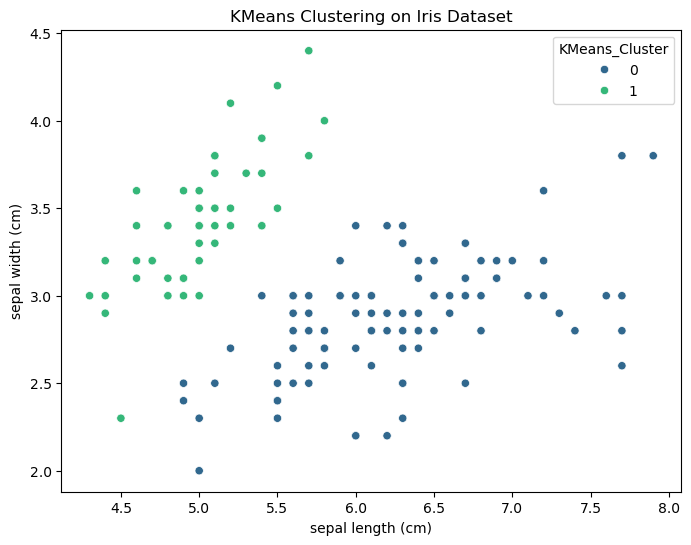

In [18]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='KMeans_Cluster', palette='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.show()

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


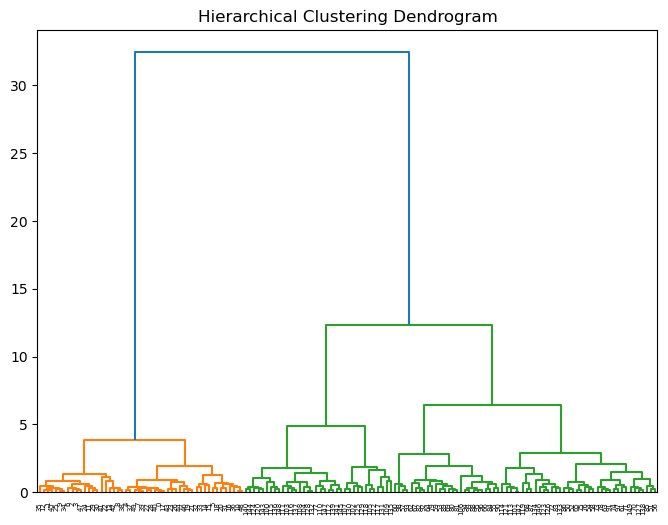

In [20]:
plt.figure(figsize=(8, 6))
linkage_matrix = linkage(df.drop(columns=['KMeans_Cluster']), method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [21]:
hc=AgglomerativeClustering(n_clusters=3,linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(df_scaled)

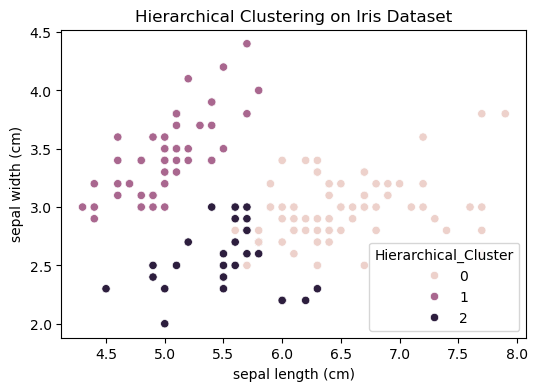

In [22]:
# Visualize clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Hierarchical_Cluster')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()